In [40]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
dmap = np.load("../data/sealion/TrainDensity/872_2.npz")["dmap"]

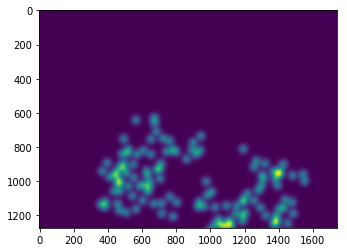

In [49]:
plt.imshow(dmap[:,:,2])

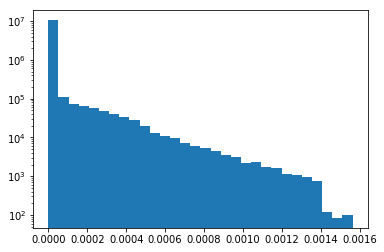

In [51]:
plt.yscale('log')
_ = plt.hist(dmap.ravel(), bins=30)

In [50]:
dmap_log = np.log(dmap + 1e-9)

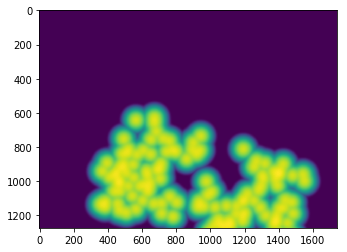

In [52]:
plt.imshow(dmap_log[:,:,2])

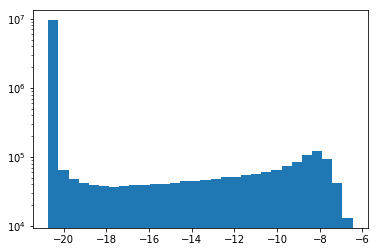

In [45]:
plt.yscale('log')
_ = plt.hist(dmap_log.ravel(), bins=30)

In [88]:
def quantize(x, nbins, vmin, vmax):
    """ Transorm each value x[i] into an integer xq[i] in [0, nbins-1]
    """
    q = (vmax - vmin)/(nbins-1)
    k = np.floor((x - vmin)/q)
    return k.astype(np.int32)

In [89]:
def dequantize(x, nbins, vmin, vmax):
    q = (vmax - vmin)/(nbins-1)
    return (x * q) + vmin

In [90]:
def to_log_space(x):
    return np.log(x + 1e-9)

In [91]:
def from_log_space(x):
    return np.exp(x) - 1e-9

In [100]:
nbins = 256
lmin = np.min(dmap_log)
lmax = np.max(dmap_log)

In [101]:
dmap_q = quantize(dmap_log, nbins, lmin, lmax)

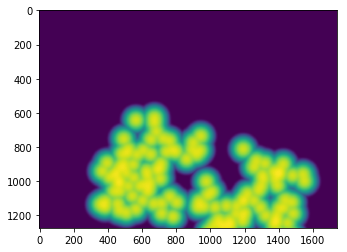

In [102]:
plt.imshow(dmap_q[:,:,2])

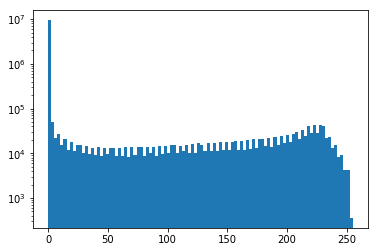

In [103]:
plt.yscale('log')
_ = plt.hist(dmap_q.ravel(), bins=100)

In [104]:
dmap_dq = dequantize(dmap_q, nbins, lmin, lmax)
dmap_rec = from_log_space(dmap_dq)

In [105]:
np.sum(dmap_rec[:,:,2])

116.51295616421982

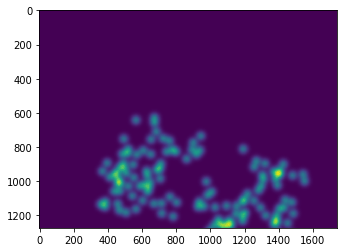

In [106]:
plt.imshow(dmap_rec[:,:,2])

In [107]:
np.sum(dmap[:,:,2])

119.80925